# Empirical CDFs and Distances Between Them

This notebook covers how to use the function `ECDF` to obtain an estimate of a CDF, and how we can use it to compute the distance between two functions. 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.optimize import minimize

Our input is some dataset that we (pretend we) don't know the distribution for. 

In [2]:
N = 13_337 # Number of observed valeus
x = np.random.standard_gamma(1., size=N)

Our model produces some simulated vector of length $R$. 

In [3]:
R = 20_000 # 
def predict_distribution(mu): 
    np.random.seed(1337) # important to make sure we get the same values each time
    v = np.random.chisquare(mu, size=(R,3))
    # then we do some calculations on v
    w = np.mean(v, axis=1)

    # and return 
    return w 

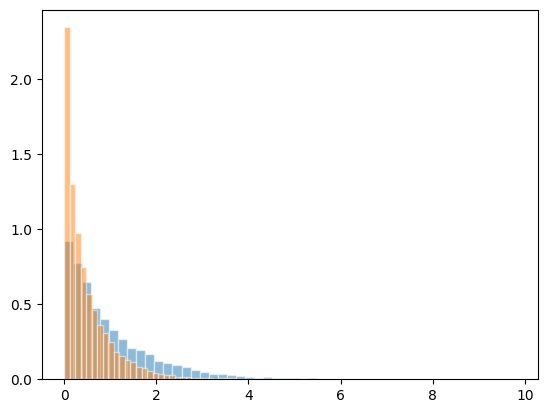

In [4]:
mu_guess = 0.5
y = predict_distribution(mu_guess)
plt.hist(x, alpha=0.5, bins=50, density=True, edgecolor='w');
plt.hist(y, alpha=0.5, bins=50, density=True, edgecolor='w');


In [5]:
# create lambda functions with the CDFs 
f_data = ECDF(x)
f_sim  = ECDF(y) 

this_x = 1.2
print(f'at x= {this_x}, the CDFs are: data = {f_data(this_x)}, sim = {f_sim(this_x)}')

at x= 1.2, the CDFs are: data = 0.7025567968808578, sim = 0.8974000000000001


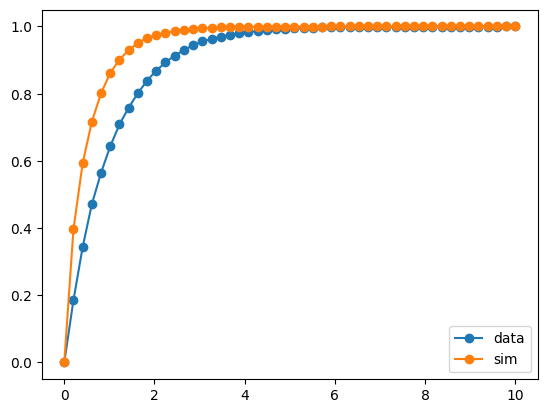

In [6]:
# we can also plot the empirical CDF functions on our grid
G = 50 # grid points 
xx = np.linspace(0,10,G)

plt.plot(xx, f_data(xx), '-o', label='data');
plt.plot(xx, f_sim(xx), '-o', label='sim');
plt.legend(); 

Now we compute the distance between the two functions squared 

In [7]:
def Q(mu): 
    w = predict_distribution(mu) # draw a fresh set of values (NOTE: important we use a seed!!)
    f_sim = ECDF(w) # f_sim is our lambda function 
    dist = (f_data(xx) - f_sim(xx))**2 # pointwise "distance" (in squared error)
    L2 = np.mean(dist) # mean is over the grid points (of which there are G)
    return L2

Distance at mu=0.5: 0.008216894210714122


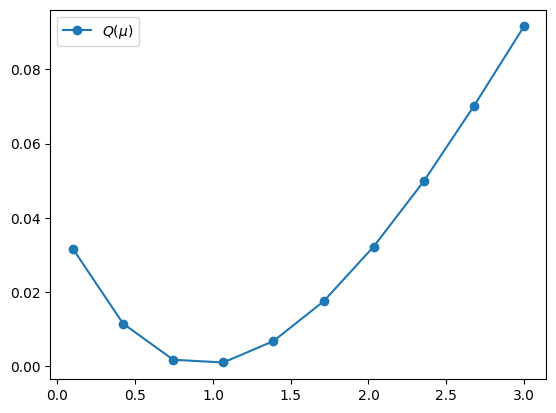

In [8]:
print(f'Distance at mu=0.5: {Q(0.5)}')
mm = np.linspace(0.1,3.,10)
yy = np.array([Q(mu) for mu in mm])
plt.plot(mm, yy, '-o', label='$Q(\mu)$'); plt.legend(); 

From here, it's simply a matter of using `minimize` from `scipy` to find the precise minimum. 